In [232]:
# Alistair Empey - CIDAF Final Project

In [233]:
import pandas as pd
from datetime import date, timedelta
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [234]:
today = date.today()
d1 = today.strftime('%Y-%m-%d')
end_date = d1

d2 = date.today() - timedelta(days=365)
d2 = d2.strftime('%Y-%m-%d')
start_date = d2

In [235]:
os.getcwd()

'/Users/aliempey/Desktop/CIDAF'

In [236]:
eurusd = pd.read_csv('/Users/aliempey/Desktop/CIDAF/EURUSD.csv')

In [237]:
eurusd = eurusd.iloc[:, [0, 4]]

In [238]:
oil = pd.read_excel('https://www.eia.gov/dnav/pet/xls/PET_PRI_SPT_S1_D.xls', sheet_name='Data 1', skiprows=[1, 2])

In [239]:
oil.head()

,Back to Contents,Data 1: Crude Oil,Unnamed: 2
0,1986-01-02,25.56,NaN
1,1986-01-03,26.00,NaN
2,1986-01-06,26.53,NaN
3,1986-01-07,25.85,NaN
4,1986-01-08,25.87,NaN


In [240]:
oil.rename(columns = {'Back to Contents':'Date', 'Data 1: Crude Oil':'Close'}, inplace = True)

In [241]:
oil.head()

,Date,Close,Unnamed: 2
0,1986-01-02,25.56,NaN
1,1986-01-03,26.00,NaN
2,1986-01-06,26.53,NaN
3,1986-01-07,25.85,NaN
4,1986-01-08,25.87,NaN


In [242]:
oil=oil.iloc[:,0:2]

In [243]:
oil.head()

,Date,Close
0,1986-01-02,25.56
1,1986-01-03,26.00
2,1986-01-06,26.53
3,1986-01-07,25.85
4,1986-01-08,25.87


In [244]:
oil['% change'] = oil['Close'].pct_change(1)

In [246]:
oil = oil[(oil['Date'] >= '2021-09-10')]
oil.reset_index()
oil.head()

,Date,Close,% change
9132,2021-09-10,69.82,0.022854
9133,2021-09-13,70.54,0.010312
9134,2021-09-14,70.53,-0.000142
9135,2021-09-15,72.59,0.029207
9136,2021-09-16,72.69,0.001378


In [247]:
eurusd['% change'] = eurusd['Close'].pct_change(1)

In [248]:
eurusd.head()

,Date,Close,% change
0,2021-09-10,1.182592,NaN
1,2021-09-13,1.181195,-0.001181
2,2021-09-14,1.181195,0.000000
3,2021-09-15,1.180498,-0.000590
4,2021-09-16,1.182000,0.001272


In [253]:
eurusd['Date'] = pd.to_datetime(eurusd['Date'])

In [254]:
eurusd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      262 non-null    datetime64[ns]
 1   Close     262 non-null    float64       
 2   % change  261 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 6.3 KB


In [306]:
df = pd.merge(oil, eurusd, how='outer', on='Date', suffixes=('_oil', '_eur/usd'))

In [307]:
df.head()

,Date,Close_oil,% change_oil,Close_eur/usd,% change_eur/usd
0,2021-09-10,69.82,0.022854,1.182592,NaN
1,2021-09-13,70.54,0.010312,1.181195,-0.001181
2,2021-09-14,70.53,-0.000142,1.181195,0.000000
3,2021-09-15,72.59,0.029207,1.180498,-0.000590
4,2021-09-16,72.69,0.001378,1.182000,0.001272


In [308]:
df = df.set_index('Date')

In [310]:
df = df.resample('D').mean()

In [311]:
df

,Close_oil,% change_oil,Close_eur/usd,% change_eur/usd
Date,,,,
2021-09-10,69.82,0.022854,1.182592,NaN
2021-09-11,NaN,NaN,NaN,NaN
2021-09-12,NaN,NaN,NaN,NaN
2021-09-13,70.54,0.010312,1.181195,-0.001181
2021-09-14,70.53,-0.000142,1.181195,0.000000
...,...,...,...,...
2022-09-05,NaN,0.000000,0.990943,-0.004311
2022-09-06,87.35,0.000687,0.995223,0.004319
2022-09-07,NaN,NaN,0.989795,-0.005454


In [312]:
cols = ['Close_oil', 'Close_eur/usd']
df.loc[:,cols] = df.loc[:,cols].ffill()

In [313]:
df

,Close_oil,% change_oil,Close_eur/usd,% change_eur/usd
Date,,,,
2021-09-10,69.82,0.022854,1.182592,NaN
2021-09-11,69.82,NaN,1.182592,NaN
2021-09-12,69.82,NaN,1.182592,NaN
2021-09-13,70.54,0.010312,1.181195,-0.001181
2021-09-14,70.53,-0.000142,1.181195,0.000000
...,...,...,...,...
2022-09-05,87.29,0.000000,0.990943,-0.004311
2022-09-06,87.35,0.000687,0.995223,0.004319
2022-09-07,87.35,NaN,0.989795,-0.005454


In [316]:
df = df.fillna(0)

In [317]:
df

,Close_oil,% change_oil,Close_eur/usd,% change_eur/usd
Date,,,,
2021-09-10,69.82,0.022854,1.182592,0.000000
2021-09-11,69.82,0.000000,1.182592,0.000000
2021-09-12,69.82,0.000000,1.182592,0.000000
2021-09-13,70.54,0.010312,1.181195,-0.001181
2021-09-14,70.53,-0.000142,1.181195,0.000000
...,...,...,...,...
2022-09-05,87.29,0.000000,0.990943,-0.004311
2022-09-06,87.35,0.000687,0.995223,0.004319
2022-09-07,87.35,0.000000,0.989795,-0.005454


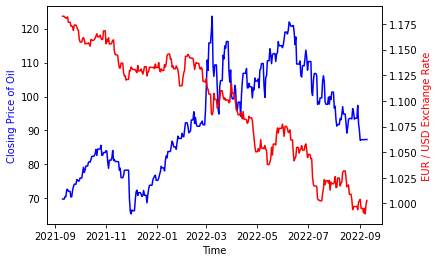

In [330]:
fig, ax = plt.subplots()
ax.plot(df.index, df['Close_oil'], color='b')
ax2=ax.twinx()
ax2.plot(df.index, df['Close_eur/usd'], color='r')
ax.set_xlabel('Time')
ax.set_ylabel('Closing Price of Oil', color='b')
ax2.set_ylabel('EUR / USD Exchange Rate', color='r')
plt.show()

                  Close_oil  % change_oil  Close_eur/usd  % change_eur/usd
Close_oil          1.000000      0.056866      -0.603672         -0.035298
% change_oil       0.056866      1.000000       0.075163         -0.055808
Close_eur/usd     -0.603672      0.075163       1.000000          0.054466
% change_eur/usd  -0.035298     -0.055808       0.054466          1.000000


<AxesSubplot:>

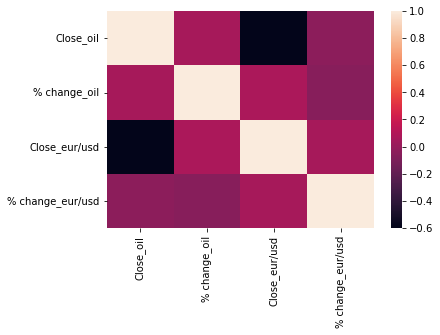

In [325]:
corr = df.corr()
print(corr)
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

In [327]:
df2 = df[(df.index > '2022-02-24')]

                  Close_oil  % change_oil  Close_eur/usd  % change_eur/usd
Close_oil          1.000000      0.188504       0.472827         -0.007100
% change_oil       0.188504      1.000000       0.086489         -0.053574
Close_eur/usd      0.472827      0.086489       1.000000          0.037756
% change_eur/usd  -0.007100     -0.053574       0.037756          1.000000


<AxesSubplot:>

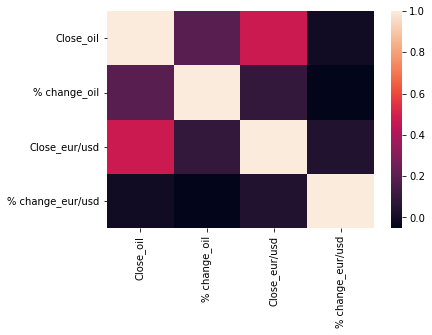

In [328]:
corr2 = df2.corr()
print(corr2)
sns.heatmap(corr2, xticklabels=corr2.columns, yticklabels=corr2.columns)